In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os
from code import *
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tqdm import tqdm

Using TensorFlow backend.


In [2]:
DATA_PATH="./data_init/"

def get_labels(path=DATA_PATH):
    labels=os.listdir(path)
    label_indices=np.arange(0,len(labels))
    return labels, label_indices, to_categorical(label_indices)

In [3]:
def speech2mfcc(file_path,max_len=11):
    wave, sr= librosa.load(file_path, mono=True, sr=None)
    wave=wave[::5]
    mfcc=librosa.feature.mfcc(wave,sr=16000)
    if (max_len > mfcc.shape[1]): #.shape[1], 1-->column
        pad_width=max_len-mfcc.shape[1]
        mfcc=np.pad(mfcc,pad_width=((0,0),(0,pad_width)),mode='constant')
    else:
        mfcc=mfcc[:,:max_len]
    return mfcc

In [4]:
def save_data_to_array(path=DATA_PATH, max_len=11):
    labels,_,_=get_labels(path)

    for label in labels:
        mfcc_vectors=[]

        speechfiles=[path + label + '/' + speech for speech in os.listdir(path+'/'+label)]
        for speech in tqdm(speechfiles,"Saving vectors to label -'{}'".format(label)):
            mfcc=speech2mfcc(speech,max_len=max_len)
            print(mfcc.shape)
            mfcc_vectors.append(mfcc)
            
        np.save(label+'.npy',mfcc_vectors)

In [5]:
def get_train_test(split_ratio=1,random_state=42):
    labels,indices,_=get_labels(DATA_PATH)

    X=np.load(labels[0]+'.npy')
    y=np.zeros(X.shape[0])

    for i,label in enumerate(labels[1:]):
        x=np.load(label+'.npy')
        X=np.vstack((X,x))
        y=np.append(y,np.full(x.shape[0],fill_value=(i+1)))
    assert X.shape[0] == len(y)
    return train_test_split(X,y,test_size=(1-split_ratio),random_state=random_state,shuffle=True)

In [57]:
save_data_to_array()

Saving vectors to label -'1':  85%|████████▍ | 22/26 [00:00<00:00, 97.05it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'10':   8%|▊         | 2/26 [00:00<00:01, 17.46it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'10':  35%|███▍      | 9/26 [00:00<00:00, 22.63it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'10':  69%|██████▉   | 18/26 [00:00<00:00, 28.94it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'10': 100%|██████████| 26/26 [00:00<00:00, 31.14it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)



Saving vectors to label -'2':  31%|███       | 8/26 [00:00<00:00, 31.68it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'2':  46%|████▌     | 12/26 [00:00<00:00, 32.69it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'2':  85%|████████▍ | 22/26 [00:00<00:00, 36.72it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'3':  12%|█▏        | 3/26 [00:00<00:00, 28.26it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'3':  38%|███▊      | 10/26 [00:00<00:00, 31.16it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'3':  69%|██████▉   | 18/26 [00:00<00:00, 33.59it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'3':  81%|████████  | 21/26 [00:00<00:00, 24.87it/s]

(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'4':   0%|          | 0/26 [00:00<?, ?it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'4':  23%|██▎       | 6/26 [00:00<00:00, 25.98it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'4':  65%|██████▌   | 17/26 [00:00<00:00, 32.80it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'4':  81%|████████  | 21/26 [00:00<00:00, 33.80it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'5':  12%|█▏        | 3/26 [00:00<00:01, 22.76it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'5':  38%|███▊      | 10/26 [00:00<00:00, 26.62it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'5':  73%|███████▎  | 19/26 [00:00<00:00, 31.88it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'6':   0%|          | 0/26 [00:00<?, ?it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'6':  35%|███▍      | 9/26 [00:00<00:00, 31.56it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'6':  58%|█████▊    | 15/26 [00:00<00:00, 33.91it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'6':  92%|█████████▏| 24/26 [00:00<00:00, 33.67it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'7':  12%|█▏        | 3/26 [00:00<00:00, 24.73it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'7':  23%|██▎       | 6/26 [00:00<00:00, 24.16it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'7':  62%|██████▏   | 16/26 [00:00<00:00, 30.85it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'8':   0%|          | 0/26 [00:00<?, ?it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'8':  23%|██▎       | 6/26 [00:00<00:00, 21.33it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'8':  58%|█████▊    | 15/26 [00:00<00:00, 27.69it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'8':  92%|█████████▏| 24/26 [00:00<00:00, 32.39it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'9':  12%|█▏        | 3/26 [00:00<00:00, 29.27it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'9':  54%|█████▍    | 14/26 [00:00<00:00, 35.75it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'9': 100%|██████████| 26/26 [00:00<00:00, 42.93it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


In [6]:
X_train, X_test, y_train, y_test=get_train_test()
X_train=X_train.reshape(X_train.shape[0],20,11,1)
#X_test=X_test.reshape(X_test.shape[0],20,11,1)
y_train_hot=to_categorical(y_train)
#y_test_hot=to_categorical(y_test)

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 19, 10, 64)        320       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 9, 5, 64)          0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 9, 5, 64)          0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 2880)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 128)               368768    
_________________________________________________________________
dropout_38 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 10)                1290      
Total para

In [47]:
weights_4[2880*0:2880*2].shape

(5760, 128)

In [94]:
weights_0=[]
weights_4=[]
weights_6=[]

for step in np.arange(50,261,20):
    
    n_X_train=X_train[:step]
    n_y_train_hot=y_train_hot[:step]
    
    model=Sequential()
    model.add(Conv2D(64,kernel_size=(2,2),activation='tanh',input_shape=(20,11,1)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(10,activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
    
    model.fit(n_X_train,n_y_train_hot,batch_size=128,epochs=20,verbose=1)
        
    if step==50:
        weights_0=model.layers[0].get_weights()[0]
        weights_4=model.layers[4].get_weights()[0]
        weights_6=model.layers[6].get_weights()[0]
    else:
        weights_0=np.vstack((weights_0,model.layers[0].get_weights()[0]))
        weights_4=np.vstack((weights_4,model.layers[4].get_weights()[0]))
        weights_6=np.vstack((weights_6,model.layers[6].get_weights()[0]))
    

Epoch 1/20
50/50 [==============================] - 2s 36ms/step - loss: 3.9916 - acc: 0.0200
Epoch 2/20
50/50 [==============================] - 0s 465us/step - loss: 2.9709 - acc: 0.3200
Epoch 3/20
50/50 [==============================] - 0s 804us/step - loss: 1.8370 - acc: 0.4000
Epoch 4/20
50/50 [==============================] - 0s 531us/step - loss: 1.2156 - acc: 0.5800
Epoch 5/20
50/50 [==============================] - 0s 669us/step - loss: 0.9543 - acc: 0.6800
Epoch 6/20
50/50 [==============================] - 0s 741us/step - loss: 0.7518 - acc: 0.6800
Epoch 7/20
50/50 [==============================] - 0s 611us/step - loss: 0.8026 - acc: 0.7000
Epoch 8/20
50/50 [==============================] - 0s 640us/step - loss: 0.4588 - acc: 0.9200
Epoch 9/20
50/50 [==============================] - 0s 748us/step - loss: 0.5017 - acc: 0.8800
Epoch 10/20
50/50 [==============================] - 0s 806us/step - loss: 0.5351 - acc: 0.8200
Epoch 11/20
50/50 [==============================]

210/210 [==============================] - 0s 558us/step - loss: 0.9722 - acc: 0.7000
Epoch 11/20
210/210 [==============================] - 0s 527us/step - loss: 0.9648 - acc: 0.6429
Epoch 12/20
210/210 [==============================] - 0s 490us/step - loss: 0.8067 - acc: 0.7095
Epoch 13/20
210/210 [==============================] - 0s 476us/step - loss: 0.8862 - acc: 0.6952
Epoch 14/20
210/210 [==============================] - 0s 615us/step - loss: 0.8242 - acc: 0.7095
Epoch 15/20
210/210 [==============================] - 0s 488us/step - loss: 0.7443 - acc: 0.7429
Epoch 16/20
210/210 [==============================] - 0s 476us/step - loss: 0.6223 - acc: 0.8000
Epoch 17/20
210/210 [==============================] - 0s 473us/step - loss: 0.6606 - acc: 0.7762
Epoch 18/20
210/210 [==============================] - 0s 513us/step - loss: 0.6630 - acc: 0.7667
Epoch 19/20
210/210 [==============================] - 0s 490us/step - loss: 0.6096 - acc: 0.7714
Epoch 20/20
210/210 [===========

In [95]:
for i in range(10):
        block_01=abs(weights_0[2*i:2*(i+1)])   #Layer_0 has 2*2*1*64 weight
        block_02=abs(weights_0[2*(i+1):2*(i+2)])
        diff_0=abs(block_01-block_02)
        
        block_41=(weights_4[2880*i:2880*(i+1)])   #Layer_4 has 2880*128 weight
        block_42=(weights_4[2880*(i+1):2880*(i+2)])
        diff_4=abs(block_41-block_42)
        
        block_61=(weights_6[128*i:128*(i+1)])   #Layer_6 has 128*10 weight
        block_62=(weights_6[128*(i+1):128*(i+2)])
        diff_6=abs(block_61-block_62)
        
        if i==0:
            mean_0=np.mean(diff_0)
            mean_4=np.mean(diff_4)
            mean_6=np.mean(diff_6)
        else:
            mean_0=np.append(mean_0,np.mean(diff_0))
            mean_4=np.append(mean_4,np.mean(diff_4))
            mean_6=np.append(mean_6,np.mean(diff_6))

In [71]:
mean_6.shape

(10,)

In [ ]:
mat_4=np.load('Average_Diff_mat_4.npy')
mat_6=np.load('Average_Diff_mat_6.npy')

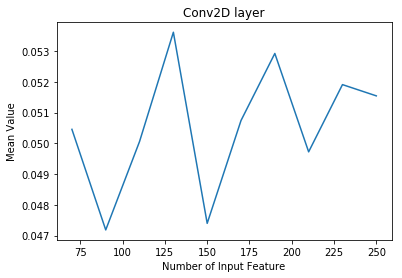

In [86]:
input_feature=np.arange(70,261,20)
plt.xlabel('Number of Input Feature')
plt.ylabel('Mean Value')
plt.plot(input_feature,mean_0)
plt.title('Conv2D layer')
plt.savefig('weights_variation_0.tiff')

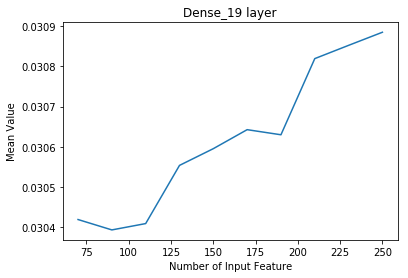

In [96]:
input_feature=np.arange(70,261,20)
plt.xlabel('Number of Input Feature')
plt.ylabel('Mean Value')
plt.plot(input_feature,mean_4)
plt.title('Dense_19 layer')
plt.savefig('weights_variation_4.tiff')

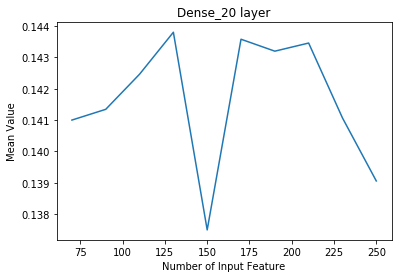

In [97]:
input_feature=np.arange(70,261,20)
plt.xlabel('Number of Input Feature')
plt.ylabel('Mean Value')
plt.plot(input_feature,mean_6)
plt.title('Dense_20 layer')
plt.savefig('weights_variation_6.svg')